In [14]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb


In [1]:
def set_seed(seed_value=42):
    """
    Set seed for reproducibility across multiple libraries
    
    Args:
        seed_value (int): Seed value for random number generators
        Default is set to 42
        
    Returns:
        None
    """
    import numpy as np
    import random
    import torch
    import os
    
    # Set Python seed
    random.seed(seed_value)
    
    # Set NumPy seed
    np.random.seed(seed_value)
    
    # Set PyTorch seed
    torch.manual_seed(seed_value)
    
    # Set environment variables for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed_value)

<h1>Loading data</h1>

In [3]:
df = pd.read_csv(r"D:\cap\covertype (2)\covertype\covtype.data\covtype.data", delimiter=',')

In [4]:
df.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [5]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 
           'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 
           'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 
           'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
           'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 
           'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 
           'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 
           'Soil_Type40', 'Cover_Type']

In [6]:
df.columns = columns

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [8]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: count, dtype: int64

<h1>Development of LSTM model</h1>

C:\Users\sa920932\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6380 - loss: 0.9713 - val_accuracy: 0.7607 - val_loss: 0.5590
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7583 - loss: 0.5741 - val_accuracy: 0.7877 - val_loss: 0.4840
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7817 - loss: 0.5110 - val_accuracy: 0.8094 - val_loss: 0.4400
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7995 - loss: 0.4693 - val_accuracy: 0.8234 - val_loss: 0.4069
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8149 - loss: 0.4371 - val_accuracy: 0.8391 - val_loss: 0.3783
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8260 - loss: 0.4108 - val_accuracy: 0.8487 - val_loss: 0.3577
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8377 - loss: 0.3895 - val_accuracy: 0.8582 - val_loss: 0.3372
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8468 - loss: 0.3707 - 

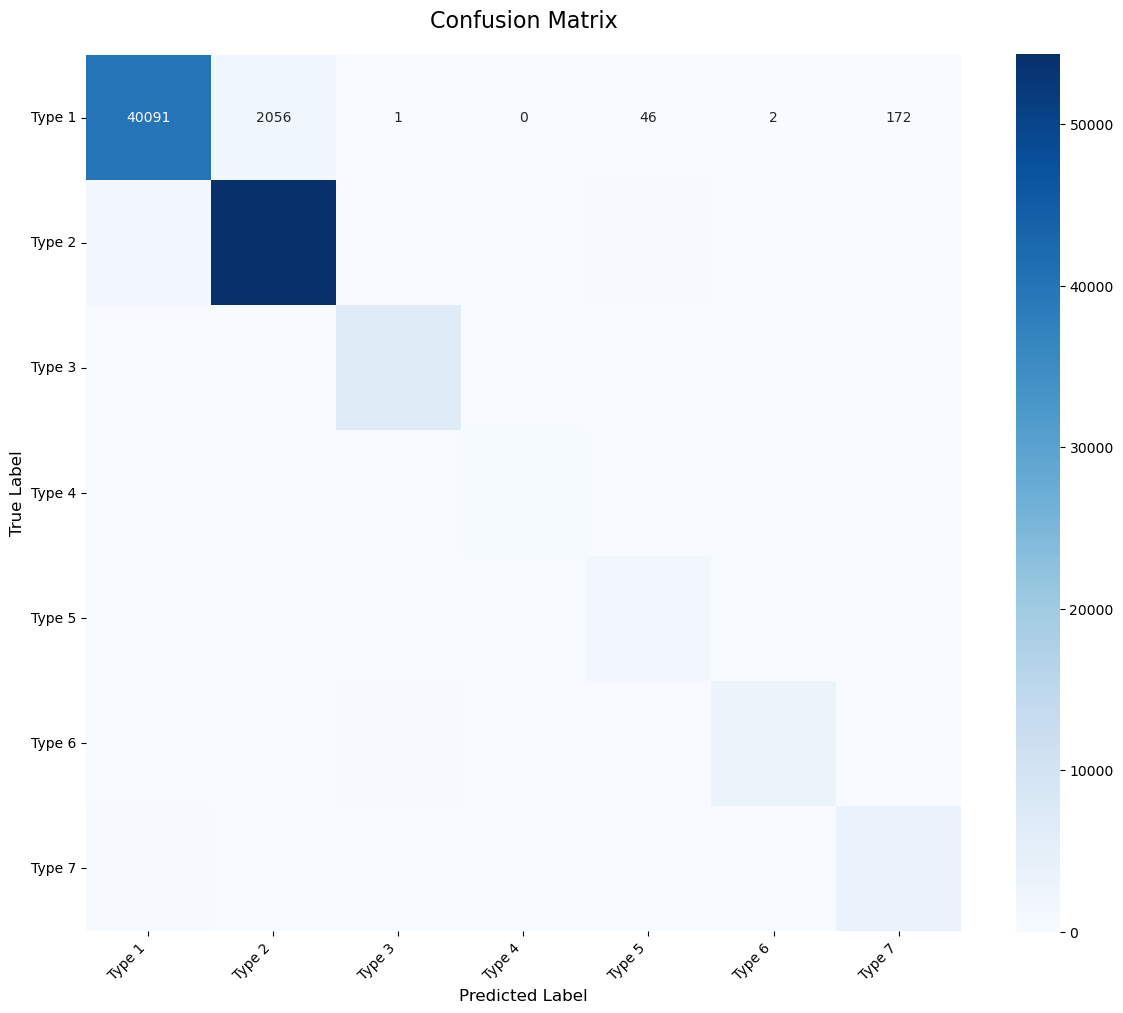

In [9]:
set_seed(42)

def prepare_data(X, y, sequence_length=3):
    """
    Prepare data for LSTM by creating sequences
    """
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:i+sequence_length])
        y_seq.append(y[i+sequence_length-1])
    return np.array(X_seq), np.array(y_seq)

def create_lstm_model(input_shape, num_classes):
    """
    Create LSTM model architecture
    """
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model


def plot_detailed_confusion_matrix(cm, classes):

    plt.figure(figsize=(12, 10))
    
    # Create the heatmap
    sns.heatmap(cm, 
                annot=True,           # Show numbers in cells
                fmt='d',              # Format as integer
                cmap='Blues',         # Blue color scheme
                square=True,          # Make cells square
                xticklabels=classes,
                yticklabels=classes,
                annot_kws={'size': 10} # Adjust annotation size
               )
    plt.title('Confusion Matrix', pad=20, size=16)
    plt.ylabel('True Label', size=12)
    plt.xlabel('Predicted Label', size=12)
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    return plt



def evaluate_model(model, X_test, y_test, label_encoder):
    """
    Evaluate model and print metrics
    """
    # Get predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    # Print metrics
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro F1-score: {f1_macro:.4f}")
    print(f"Weighted F1-score: {f1_weighted:.4f}")
    
    # Print detailed classification report
    class_names = [f"Type {i}" for i in label_encoder.classes_]
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Plot confusion matrix
    plot_detailed_confusion_matrix(cm, class_names)
    
    return accuracy, f1_macro, f1_weighted, cm

def train_and_evaluate_forest_cover_model(df, feature_columns, target_column='Cover_Type', sequence_length=3):
    """
    Train LSTM model and evaluate performance
    """
    # Prepare features and target
    X = df[feature_columns].values
    y = df[target_column].values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode target
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = to_categorical(y_encoded)
    
    # Create sequences
    X_seq, y_seq = prepare_data(X_scaled, y_categorical, sequence_length)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq.argmax(axis=1)
    )
    
    # Create and compile model
    input_shape = (sequence_length, X.shape[1])
    num_classes = len(np.unique(y))
    model = create_lstm_model(input_shape, num_classes)
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Define callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=1000,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Evaluate model
    metrics = evaluate_model(model, X_test, y_test, label_encoder)
    
    return model, history, metrics, scaler, label_encoder


feature_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points'] + \
                 [f'Wilderness_Area{i}' for i in range(1, 5)] + \
                 [f'Soil_Type{i}' for i in range(1, 41)]

model, history, metrics, scaler, label_encoder = train_and_evaluate_forest_cover_model(df, feature_columns)
accuracy, f1_macro, f1_weighted, confusion_matrix = metrics

In [20]:
accuracy, f1_macro, f1_weighted, confusion_matrix

(0.9453451747818454,
 0.9014368119461623,
 0.9452273452072515,
 array([[39776,  2318,     1,     0,    46,     2,   225],
        [ 1778, 54436,    96,     0,   207,   103,    40],
        [    0,   112,  6768,    38,    12,   221,     0],
        [    0,     0,    97,   418,     0,    34,     0],
        [   41,   273,    39,     0,  1530,    15,     0],
        [    4,    85,   295,    11,    14,  3065,     0],
        [  219,    22,     0,     0,     3,     0,  3858]], dtype=int64))

In [28]:
model

<Sequential name=sequential_4, built=True>

<h1>Plotting confusion matrix</h1>

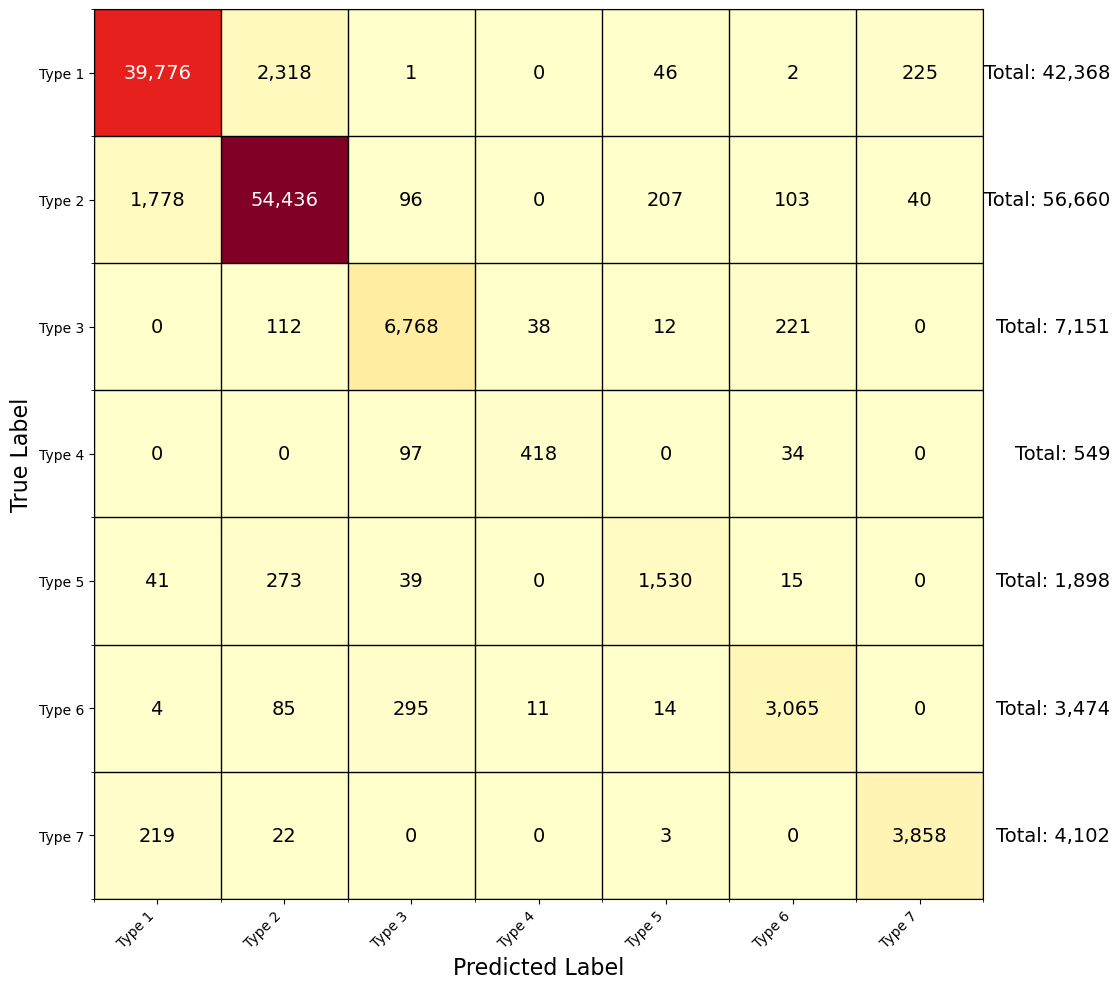

In [10]:
def plot_colored_confusion_matrix_with_grid():
    # Create the confusion matrix
    cm = np.array([
        [39776,  2318,     1,     0,    46,     2,   225],
        [ 1778, 54436,    96,     0,   207,   103,    40],
        [    0,   112,  6768,    38,    12,   221,     0],
        [    0,     0,    97,   418,     0,    34,     0],
        [   41,   273,    39,     0,  1530,    15,     0],
        [    4,    85,   295,    11,    14,  3065,     0],
        [  219,    22,     0,     0,     3,     0,  3858]
    ])
    
    # Calculate row totals
    row_totals = cm.sum(axis=1)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Create the heatmap
    im = ax.imshow(cm, cmap='YlOrRd')
    
    # Add colorbar
    #cbar = plt.colorbar(im)
    #cbar.set_label('Number of Samples', rotation=270, labelpad=15)
    
    # Add grid
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    
    # Label axes
    class_labels = [f'Type {i}' for i in range(1, 8)]
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    
    # Add grid lines
    ax.set_xticks(np.arange(-.5, cm.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, cm.shape[0], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    
    # Add numbers inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # Choose text color based on background darkness
            color = "white" if cm[i, j] > np.max(cm)/2 else "black"
            text = ax.text(j, i, format(cm[i, j], ','),
                         ha="center", va="center", fontsize = 14, color=color)
    
    # Add row totals
    for idx, total in enumerate(row_totals):
        ax.text(cm.shape[1] + 0.5, idx, f'Total: {total:,}',
                ha="right", va="center", fontsize =14)
    
    # Add labels and title
    plt.xlabel('Predicted Label', fontsize = 16)
    plt.ylabel('True Label', fontsize =16)
    #plt.title('Forest Cover Type Confusion Matrix')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

# Generate the plot
plot_colored_confusion_matrix_with_grid()
plt.show()

In [11]:
feature_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 
           'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 
           'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 
           'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
           'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 
           'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 
           'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 
           'Soil_Type40']

In [12]:
sequence_length = 3
X = df[feature_columns].values
y = df['Cover_Type'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y_categorical, test_size=0.2, random_state=42
)

<h1>Building XGBoost Model</h1>

Unique classes after encoding: [0 1 2 3 4 5 6]


C:\Users\sa920932\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:1.75932	train-merror:0.26566	eval-mlogloss:1.75976	eval-merror:0.26702
[10]	train-mlogloss:0.97889	train-merror:0.23905	eval-mlogloss:0.98221	eval-merror:0.23971
[20]	train-mlogloss:0.72360	train-merror:0.22758	eval-mlogloss:0.72881	eval-merror:0.22888
[30]	train-mlogloss:0.60966	train-merror:0.21884	eval-mlogloss:0.61620	eval-merror:0.22032
[40]	train-mlogloss:0.55022	train-merror:0.21258	eval-mlogloss:0.55751	eval-merror:0.21407
[50]	train-mlogloss:0.51264	train-merror:0.20666	eval-mlogloss:0.52075	eval-merror:0.20852
[60]	train-mlogloss:0.48725	train-merror:0.20048	eval-mlogloss:0.49592	eval-merror:0.20309
[70]	train-mlogloss:0.47043	train-merror:0.19545	eval-mlogloss:0.47951	eval-merror:0.19805
[80]	train-mlogloss:0.45744	train-merror:0.19093	eval-mlogloss:0.46683	eval-merror:0.19370
[90]	train-mlogloss:0.44620	train-merror:0.18630	eval-mlogloss:0.45585	eval-merror:0.18986
[99]	train-mlogloss:0.43809	train-merror:0.18343	eval-mlogloss:0.44799	eval-merror:0.18707


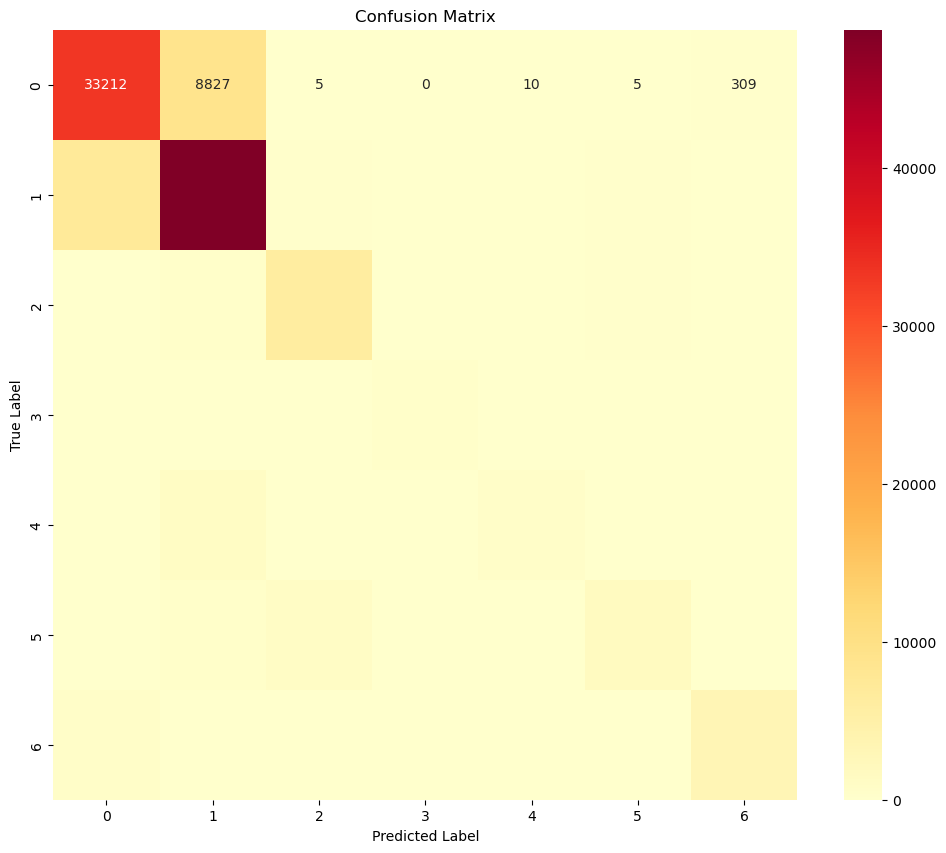

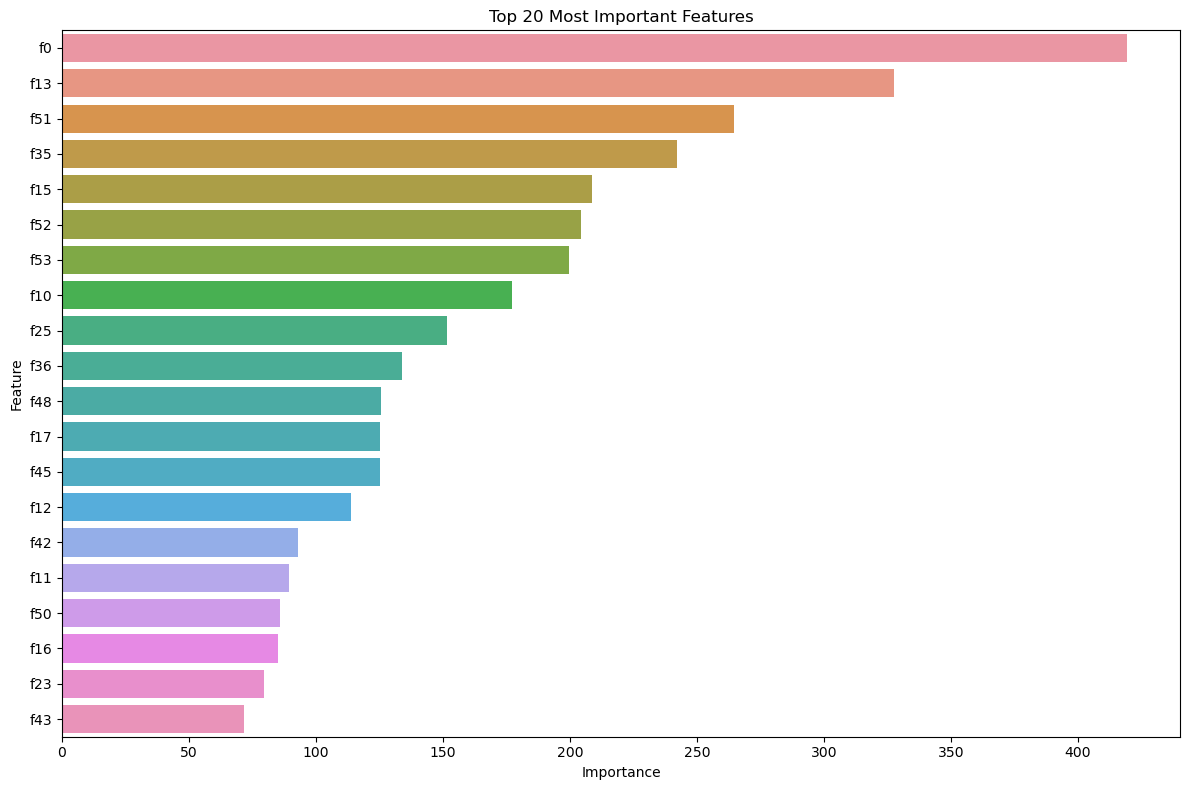

In [15]:
def prepare_data(X, y):
    """
    Prepare data with proper label encoding for XGBoost
    """
    # Create label encoder
    le = LabelEncoder()
    
    # Fit and transform the labels to start from 0
    y_encoded = le.fit_transform(y)
    
    # Verify the unique classes start from 0
    print("Unique classes after encoding:", np.unique(y_encoded))
    
    return X, y_encoded, le

def train_xgboost_model(X, y):
    """
    Train XGBoost model with proper label encoding
    """
    # Prepare data with proper encoding
    X, y_encoded, label_encoder = prepare_data(X, y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    # Create DMatrix with encoded labels
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Set XGBoost parameters
    params = {
        'objective': 'multi:softmax',
        'num_class': len(np.unique(y_encoded)),  # Number of unique classes after encoding
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'min_child_weight': 1,
        'gamma': 0,
        'eval_metric': ['mlogloss', 'merror'],
        'tree_method': 'hist'
    }
    
    # Create evaluation list
    evallist = [(dtrain, 'train'), (dtest, 'eval')]
    
    # Train the model
    num_rounds = 100
    model1 = xgb.train(
        params,
        dtrain,
        num_rounds,
        evallist,
        early_stopping_rounds=20,
        verbose_eval=10
    )
    
    # Make predictions
    y_pred = model1.predict(dtest)
    
    # Convert predictions and test labels back to original classes for evaluation
    y_pred_original = label_encoder.inverse_transform(y_pred.astype(int))
    y_test_original = label_encoder.inverse_transform(y_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_original, y_pred_original)
    class_report = classification_report(y_test_original, y_pred_original)
    conf_matrix = confusion_matrix(y_test_original, y_pred_original)
    
    # Get feature importance
    importance_scores = model1.get_score(importance_type='gain')
    
    return {
        'model1': model1,
        'label_encoder': label_encoder,
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix,
        'feature_importance': importance_scores,
        'X_test': X_test,
        'y_test': y_test_original,
        'y_pred': y_pred_original
    }

def plot_confusion_matrix(conf_matrix):
    """
    Plot confusion matrix with proper formatting
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_feature_importance(importance_scores, top_n=20):
    """
    Plot top N most important features
    """
    importance_df = pd.DataFrame({
        'Feature': list(importance_scores.keys()),
        'Importance': list(importance_scores.values())
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
    plt.title(f'Top {top_n} Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return importance_df


feature_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points'] + \
                 [f'Wilderness_Area{i}' for i in range(1, 5)] + \
                 [f'Soil_Type{i}' for i in range(1, 41)]

# Prepare data
X = df[feature_columns].values
y = df['Cover_Type'].values  # Original labels will be encoded automatically

# Train and evaluate the model
results = train_xgboost_model(X, y)

# Print results
print("\nModel Accuracy:", results['accuracy'])
print("\nClassification Report:")
print(results['classification_report'])

# Plot confusion matrix
plot_confusion_matrix(results['confusion_matrix'])

# Plot feature importance
importance_df = plot_feature_importance(results['feature_importance'])

# For predictions on new data
def predict_new_data(model1, X_new, label_encoder):
    dtest = xgb.DMatrix(X_new)
    y_pred = model1.predict(dtest)
    return label_encoder.inverse_transform(y_pred.astype(int))

<h1>Plotting confusion matrix</h1>

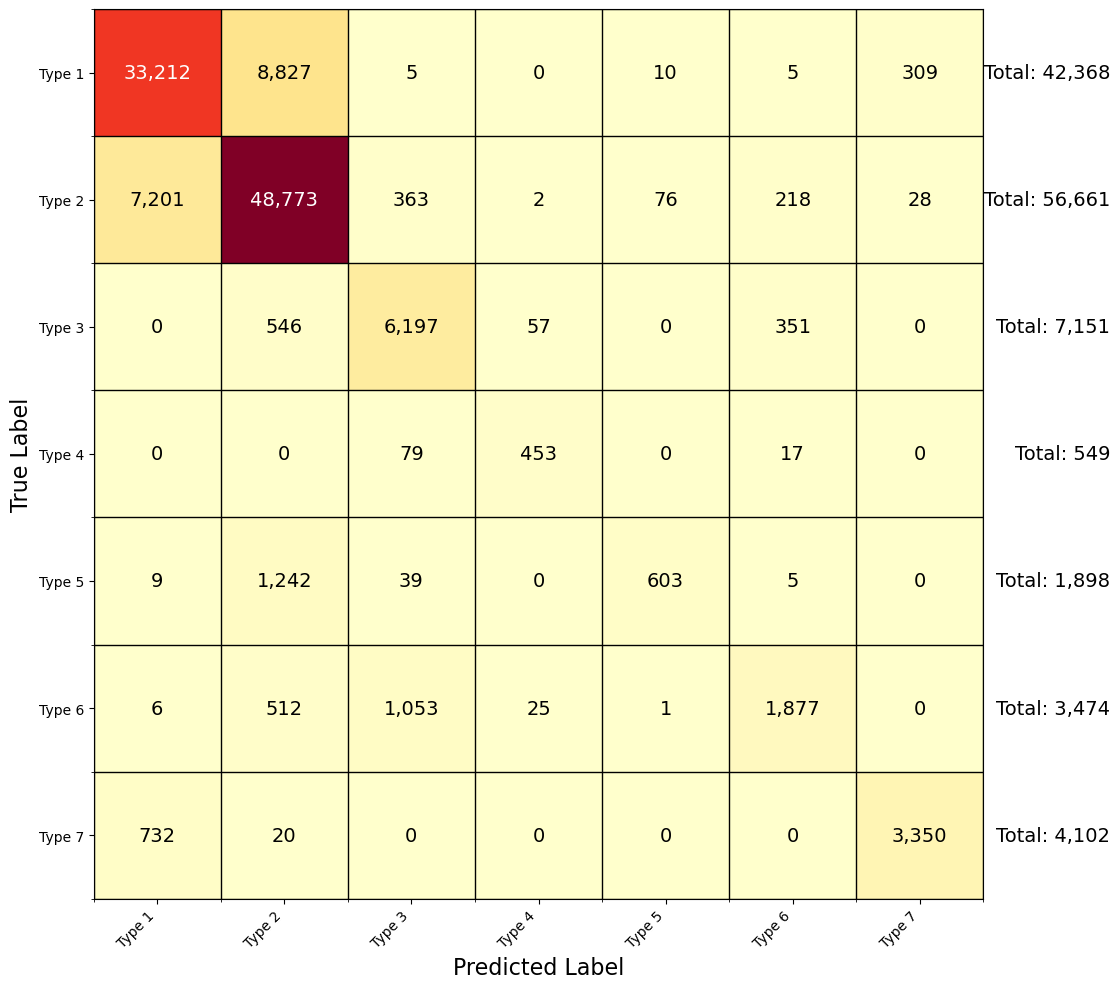

In [16]:
def plot_colored_confusion_matrix_with_grid():
    # Create the confusion matrix
    cm = np.array([
        [33212,  8827,     5,     0,    10,     5,   309],
        [ 7201, 48773,   363,     2,    76,   218,    28],
        [    0,   546,  6197,    57,     0,   351,     0],
        [    0,     0,    79,   453,     0,    17,     0],
        [    9,  1242,    39,     0,   603,     5,     0],
        [    6,   512,  1053,    25,     1,  1877,     0],
        [  732,    20,     0,     0,     0,     0,  3350]
    ])
    
    # Calculate row totals
    row_totals = cm.sum(axis=1)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Create the heatmap
    im = ax.imshow(cm, cmap='YlOrRd')
    
    # Add colorbar
    #cbar = plt.colorbar(im)
    #cbar.set_label('Number of Samples', rotation=270, labelpad=15)
    
    # Add grid
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    
    # Label axes
    class_labels = [f'Type {i}' for i in range(1, 8)]
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    
    # Add grid lines
    ax.set_xticks(np.arange(-.5, cm.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, cm.shape[0], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    
    # Add numbers inside cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # Choose text color based on background darkness
            color = "white" if cm[i, j] > np.max(cm)/2 else "black"
            text = ax.text(j, i, format(cm[i, j], ','),
                         ha="center", va="center", fontsize = 14, color=color)
    
    # Add row totals
    for idx, total in enumerate(row_totals):
        ax.text(cm.shape[1] + 0.5, idx, f'Total: {total:,}',
                ha="right", va="center", fontsize =14)
    
    # Add labels and title
    plt.xlabel('Predicted Label', fontsize = 16)
    plt.ylabel('True Label', fontsize =16)
    #plt.title('Forest Cover Type Confusion Matrix')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

# Generate the plot
plot_colored_confusion_matrix_with_grid()
plt.show()

In [47]:
results

{'model1': <xgboost.core.Booster at 0x14e80e2a8d0>,
 'label_encoder': LabelEncoder(),
 'accuracy': 0.8129308193420135,
 'classification_report': '              precision    recall  f1-score   support\n\n           1       0.81      0.78      0.80     42368\n           2       0.81      0.86      0.84     56661\n           3       0.80      0.87      0.83      7151\n           4       0.84      0.83      0.83       549\n           5       0.87      0.32      0.47      1898\n           6       0.76      0.54      0.63      3474\n           7       0.91      0.82      0.86      4102\n\n    accuracy                           0.81    116203\n   macro avg       0.83      0.72      0.75    116203\nweighted avg       0.81      0.81      0.81    116203\n',
 'confusion_matrix': array([[33212,  8827,     5,     0,    10,     5,   309],
        [ 7201, 48773,   363,     2,    76,   218,    28],
        [    0,   546,  6197,    57,     0,   351,     0],
        [    0,     0,    79,   453,     0,  

<h1>feature importance plot</h1>


Top Features by Importance:
--------------------------------------------------
Elevation (m)                            419.2403
Wilderness Area 4                        327.7607
Soil Type 38                             264.4590
Soil Type 22                             242.2254
Soil Type 2                              208.7102
Soil Type 39                             204.3222
Soil Type 40                             199.5820
Wilderness Area 1                        177.1617
Soil Type 12                             151.6333
Soil Type 23                             133.7411


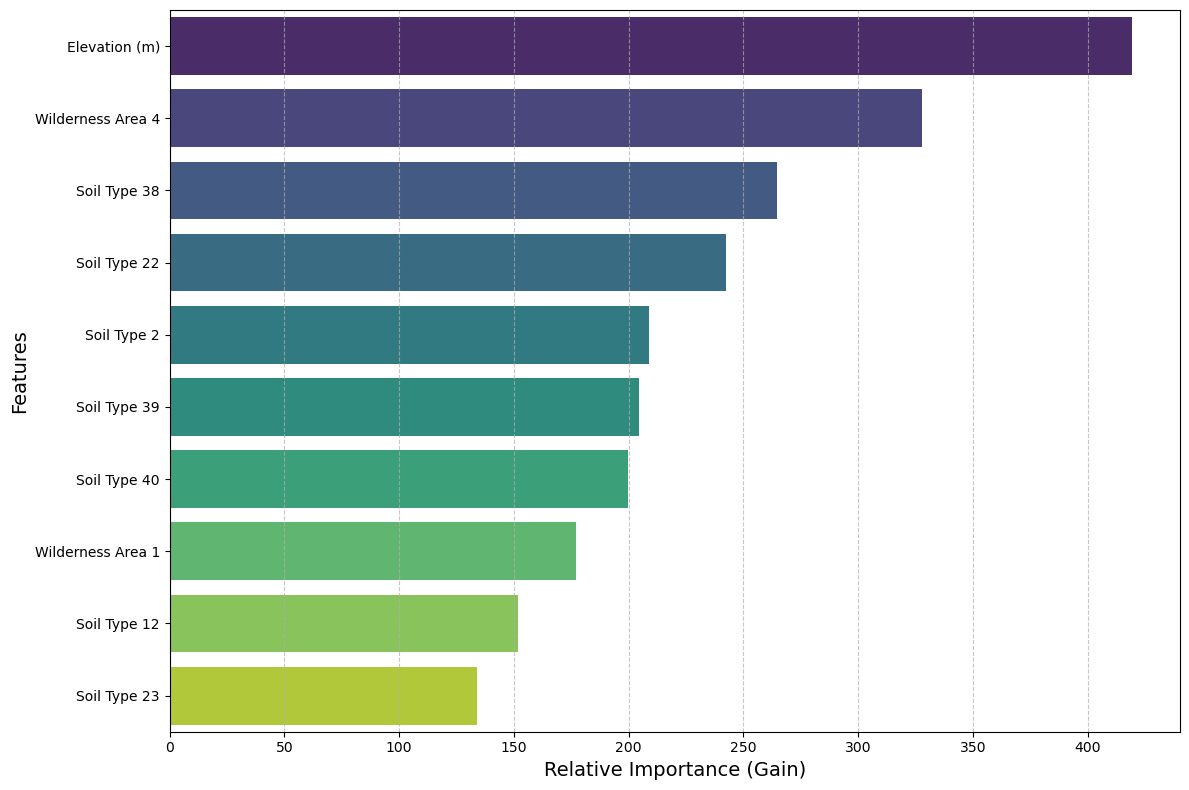

In [17]:
def get_feature_descriptions():
    """
    Return a dictionary mapping feature names to their descriptions
    """
    return {
        'Elevation': 'Elevation (m)',
        'Aspect': 'Aspect (degrees azimuth)',
        'Slope': 'Slope (degrees)',
        'Horizontal_Distance_To_Hydrology': 'Horizontal Distance to Water (m)',
        'Vertical_Distance_To_Hydrology': 'Vertical Distance to Water (m)',
        'Horizontal_Distance_To_Roadways': 'Horizontal Distance to Roadways (m)',
        'Hillshade_9am': 'Hillshade 9am (0-255)',
        'Hillshade_Noon': 'Hillshade Noon (0-255)',
        'Hillshade_3pm': 'Hillshade 3pm (0-255)',
        'Horizontal_Distance_To_Fire_Points': 'Horizontal Distance to Fire Points (m)'
    }

def plot_feature_importance(importance_scores, feature_names, top_n=20):
    """
    Plot feature importance with actual feature names in descending order
    
    Parameters:
    -----------
    importance_scores : dict
        Dictionary of feature importance scores from XGBoost
    feature_names : list
        List of original feature names
    top_n : int
        Number of top features to display
    """
    # Create DataFrame with feature importance scores
    importance_df = pd.DataFrame({
        'Feature': list(importance_scores.keys()),
        'Importance': list(importance_scores.values())
    })
    
    # Map feature indices to actual feature names
    feature_mapping = {f'f{i}': name for i, name in enumerate(feature_names)}
    importance_df['Feature'] = importance_df['Feature'].map(lambda x: feature_mapping.get(x, x))
    
    # Get feature descriptions
    feature_desc = get_feature_descriptions()
    
    # Create readable labels
    def create_readable_label(feature):
        if feature.startswith('Wilderness_Area'):
            area_num = feature.split('Wilderness_Area')[1]
            return f'Wilderness Area {area_num}'
        elif feature.startswith('Soil_Type'):
            soil_num = feature.split('Soil_Type')[1]
            return f'Soil Type {soil_num}'
        else:
            return feature_desc.get(feature, feature)
    
    importance_df['Display_Name'] = importance_df['Feature'].map(create_readable_label)
    
    # Sort by importance in descending order and get top N features
    importance_df = importance_df.nlargest(top_n, 'Importance')
    
    # Create plot
    plt.figure(figsize=(12, max(8, top_n * 0.3)))  # Adjust height based on number of features
    
    # Create barplot with descending order
    sns.barplot(x='Importance', 
                y='Display_Name',
                data=importance_df,
                palette='viridis')
    
    # Customize plot
    #plt.title('Feature Importance in Forest Cover Type Prediction', pad=20, size=14)
    plt.xlabel('Relative Importance (Gain)', size=14)
    plt.ylabel('Features', size=14)
    
    # Add grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    # Print the top features and their importance scores
    print("\nTop Features by Importance:")
    print("-" * 50)
    for idx, row in importance_df.iterrows():
        print(f"{row['Display_Name']:<40} {row['Importance']:>.4f}")
    
    return importance_df

feature_columns = ['Elevation', 'Aspect', 'Slope', 
                  'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology', 
                  'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points'] + \
                 [f'Wilderness_Area{i}' for i in range(1, 5)] + \
                 [f'Soil_Type{i}' for i in range(1, 41)]

# After training your XGBoost model and getting importance_scores:
importance_df = plot_feature_importance(
    importance_scores=results['feature_importance'],
    feature_names=feature_columns,
    top_n=10
)
plt.show()